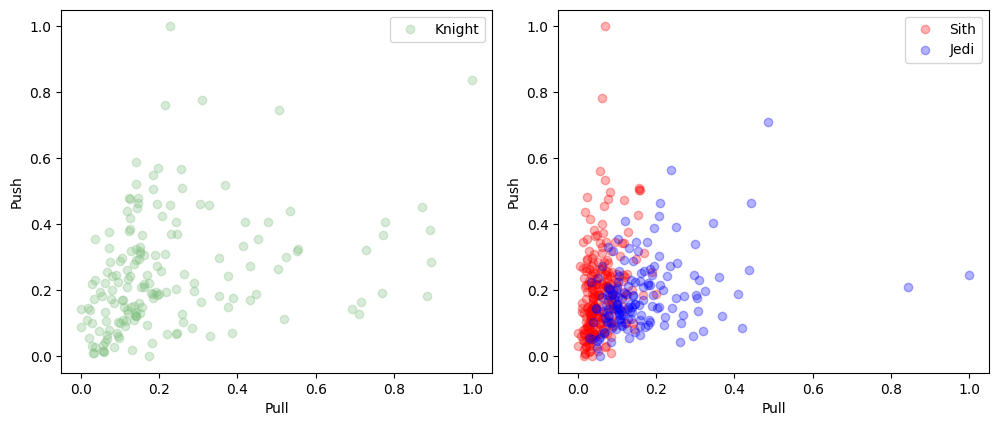

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
# 1) Charger les données
train_path = "/home/machouba/CC_42/Train_knight.csv"
test_path  = "/home/machouba/CC_42/Test_knight.csv"
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

# 2) Normalizer les données
def normalize_data(data: np.array) -> np.array:
    a = data.min()
    b = data.max()
    return (data - a) / (b - a)
# 3) Normalizer les données test
rigel = normalize_data(df_test)

# 4) Normalizer les données train
data_artemis = df_train[df_train.columns[:-1]]
knight = df_train["knight"]
artemis = normalize_data(data_artemis)
data = pd.DataFrame(artemis, columns=data_artemis.columns)
data = data.join(knight)


# 5) Visualiser les données
fig = plt.figure(figsize=(25,25))

plot = plt.subplot2grid((6, 5), (0, 0), fig=fig)

plot.scatter(rigel["Pull"], rigel["Push"], label='Knight', color='#7fbf7f', alpha=0.3)
plot.set_xlabel('Pull')
plot.set_ylabel('Push')
plot.legend()

plot = plt.subplot2grid((6, 5), (0, 1), fig=fig)

plt.scatter(data[data['knight'] == 'Sith']['Pull'], data[data['knight'] == 'Sith']['Push'], label='Sith', color='r', alpha=0.3)
plt.scatter(data[data['knight'] == 'Jedi']['Pull'], data[data['knight'] == 'Jedi']['Push'], label='Jedi', color='blue', alpha=0.3)
plot.set_xlabel('Pull')   # x = Pull
plot.set_ylabel('Push')  # y = Push
plot.legend()

plt.tight_layout()
plt.show()